# Method 2
First deblur the signal using dtft and then remove the additive noise 

In [27]:
# importing required libraries for basic mathematics and manupulation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [28]:
#reads the csv and stores it in a dataframe

df = pd.read_csv('data.csv')


In [29]:
#displays first five rows
df.head()

,x[n],y[n]
0,35.4312,33.3735
1,35.1511,34.3744
2,34.8284,35.7514
3,34.4656,35.5869
4,34.0656,36.0826


In [30]:
# removing headers

df = df.rename(columns={col: "" for col in df})
df.head()

,,
0,35.4312,33.3735
1,35.1511,34.3744
2,34.8284,35.7514
3,34.4656,35.5869
4,34.0656,36.0826


In [31]:
# converting data into 1D lists
x = df.iloc[:,0]
y = df.iloc[:,1]
y.head()

0    33.3735
1    34.3744
2    35.7514
3    35.5869
4    36.0826
Name: , dtype: float64

In [32]:
# converts to numpy array which supports complex number manipulation
x = np.array(x)
y = np.array(y)

# Representation of Initial signals

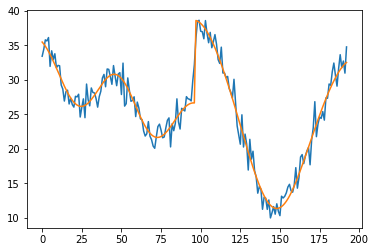

In [33]:
plt.plot(range(0,193),y)
plt.plot(range(0,193),x)

# Step 1 : Deblurring the signal using Discrete time fourier transform

In [34]:
# dtft algorithm for y[n]

N = len(y)
w = np.linspace(0,2*math.pi,N)                          # taking 193 samples of w between 0 and 2*pi

X = np.zeros(N,dtype = 'complex_')                      # array to store dtft

for k in range(0,N-1):                                  # outer loop to change the value of k 
    X[k] = 0
    
    for n in range(0,N-1):                              # inner loop to change the value of n
        
        X[k] = X[k] + y[n]* math.e**(-1j *w[k] *n)              # formula for dtft

Plot for DTFT

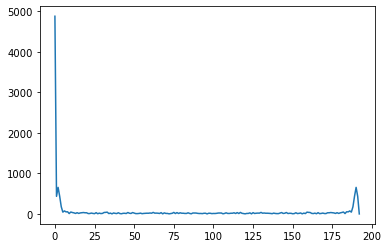

In [35]:
plt.plot(range(0,193),abs(X))

In [36]:
# dtft for h[n]

h = np.array([1/16, 1/4, 3/8, 1/4, 1/16])

N = 193

w=[]
for i in range (193):
    w.append(2*math.pi*i/193)

H = np.zeros(N,dtype = 'complex_')

for k in range(0,N-1):
    H[k-2] = 0
    
    for n in range(0,5):
        
        H[k-2] = H[k-2] + h[n]* math.e**(-1j *w[k-2] *n)

# Plot for DTFT of h[n]

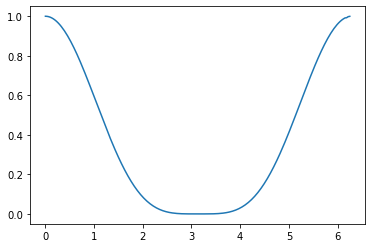

In [37]:
H[190] = (H[191] + H[189]) /2

plt.plot(range(0,193),abs(H))



In [38]:
# In the above plot we see that H(e^jw) approches zero at certain values and thus X_final(e^jw) may shoot to infinity.
# To avoid this senario we clip the graph at an appropriate value which is determined by trail and error and assign the same
# value to all the values below the threshold

H_mod = list(abs(H))

for n, i in enumerate(H_mod):
    if i < 0.8:
        H_mod[n] = 0.8

In [39]:
print(H_mod.index(0.8))

print(H[21])

21
(0.15920910143656403-0.7716376423250288j)


In [40]:
for i in range(22,172):               # assigns the given to all the numbers in this range
    
    H[i] = 0.15920910143656403-0.7716376423250288j
    


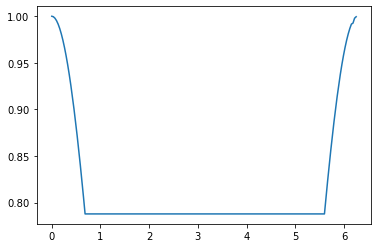

In [41]:
plt.plot(range(0,193),abs(H))

In [42]:
X_final = X/H                                   # dtft for the X_final 

In [43]:
# using inverse fourier transform on X_final

N = len(X_final)
w = np.linspace(0,2*math.pi,N)                  # taking 193 samples of w between 0 and 2*pi

X1 = np.zeros(N,dtype = 'complex_')

# Applying the summation formula for inverse dtft

for k in range(0,N-1):
    X1[k] = 0
    
    for n in range(0,N-1):
        
        X1[k] = ( X1[k] + X_final[n]* math.e**(1j * w[k] *n))
        
X1 = X1 / 193

# Plot after Deblur

<function matplotlib.pyplot.show(close=None, block=None)>

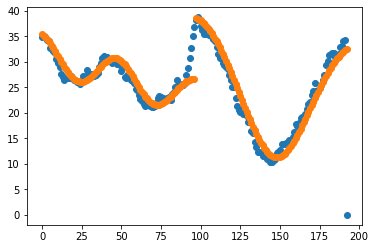

In [44]:
plt.scatter(range(0,193),abs(X1))
plt.scatter(range(0,193),x)
#plt.plot(w,y)

plt.show

In [45]:
y_deblurred = np.array(abs(X1))

# Denoising the blurred signal using moving averages

In [46]:
# denoising the signal using moving averages of window_size = 5 :

window_size = 5                   # indicates that we are taking average of 5 consecutive samples

i = 0
X2 = []

while i < len(y) - window_size + 1:                     # while loop used untill the array ends, shifts the window by 
                                                        # one unit everytime the loop runs
    
    this_window = y_deblurred[i : i + window_size]


    window_average = sum(this_window) / window_size
    X2.append(window_average)
    i += 1

# we fall short of 4 values when window size is 5 and we add them
# manually by using the same method but averaging 3 values to ensure
# minimum deviation at the edges

X2.insert(-2,(y_deblurred[-2]+y_deblurred[-3]+y_deblurred[-4])/3) 
X2.insert(-1,(y_deblurred[-1]+y_deblurred[-2]+y_deblurred[-3])/3)


X2.insert(0,(y_deblurred[0]+y_deblurred[1]+y_deblurred[2])/3)
X2.insert(1,(y_deblurred[1]+y_deblurred[2]+y_deblurred[3])/3)


# Final plot for X2[n] and comparison with original x[n]

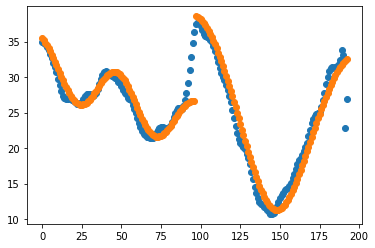

In [47]:
plt.scatter(range(0,193),X2)
plt.scatter(range(0,193),x)

In [48]:
# for comparing these plots we can calculate the mean error between all the values
# As the value of error decreases, accuracy of determining x[n] increases.

abs_error = []

for i in range(0,191):                     # excluding last 2 values since they are way off true value
    abs_error.append(abs(X2[i]+x[i]))
    
mean_error = sum(abs_error)/191

print(mean_error)

50.622467196875064


By observing the mean_errors of both plots, we see that error in method 1 was less than error in method 2, although not by a significant margin. But in practical applications, the number of values are could be higher and that will only elevate the difference in errors between these methods.

Thus, we can conclude that method 1 is a better alternative to recover original signal from the transmitted signal.